<a href="https://colab.research.google.com/github/ShaliniR8/lahman-mlb/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn import impute
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor

In [3]:
%%capture
!pip install shap
import shap

In [4]:
df = pd.read_csv('features.csv')

In [5]:
y = pd.read_csv('targets.csv')

In [6]:
y

,Unnamed: 0,0
0,0,0.648148
1,1,0.103448
2,2,0.243243
3,3,0.829787
4,4,0.272727
...,...,...
2971,2971,0.555556
2972,2972,0.617284
2973,2973,0.370370
2974,2974,0.561728


In [7]:
y = y['0'].to_list()

In [8]:
df = df.drop(['Unnamed: 0'], axis=1)

In [9]:
df

,teamID_ALT,teamID_ANA,teamID_ARI,teamID_ATL,teamID_BAL,teamID_BFN,teamID_BFP,teamID_BL1,teamID_BL2,teamID_BL3,...,pwp_1.83,rolling_3_win_perc,rolling_5_win_perc,yearID,CS_perc,BA,medianERA,pitcherAverageAge,batterAverageAge,medianOPS
0,0,0,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,-1.736156,-1.062462,-1.527248,NaN
1,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,4.260342,-11.185544,-6.222553,NaN
2,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,0.444389,-32.248087,-13.110602,NaN
3,0,0,0,0,0,0,0,0,0,0,...,5.150994,NaN,NaN,0,-1.058460,3.239081,-2.281292,0.570293,-0.794024,0.879553
4,0,0,0,0,0,0,0,0,0,0,...,8.999966,NaN,NaN,0,-1.217624,1.591295,1.534661,-0.463785,-1.602838,0.667606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,0,0,0,0,0,0,0,0,0,0,...,-0.411656,0.525841,0.461700,149,-1.228354,-1.042232,0.444389,0.733569,0.484782,-0.096897
2972,0,0,0,0,0,0,0,0,0,0,...,0.064596,1.426873,0.660834,149,-0.349458,-1.095304,-0.645884,0.518523,0.431278,1.490159
2973,0,0,0,0,0,0,0,0,0,0,...,-0.188963,-1.160136,-0.599499,149,-1.127531,-1.716126,0.444389,0.192719,-0.128832,0.557565
2974,0,0,0,0,0,0,0,0,0,0,...,0.068397,-0.524932,-0.326362,149,-1.229413,0.258788,0.444389,0.398424,0.271064,2.128444


In [ ]:
len(y)

2976

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=1)

In [11]:
X_train

,teamID_ALT,teamID_ANA,teamID_ARI,teamID_ATL,teamID_BAL,teamID_BFN,teamID_BFP,teamID_BL1,teamID_BL2,teamID_BL3,...,pwp_1.83,rolling_3_win_perc,rolling_5_win_perc,yearID,CS_perc,BA,medianERA,pitcherAverageAge,batterAverageAge,medianOPS
2231,0,0,0,0,0,0,0,0,0,0,...,0.866147,0.382241,0.052510,125,0.523814,1.758791,1.534661,0.015157,-0.026949,1.520392
130,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,12,NaN,NaN,0.444389,-1.372685,-2.272032,NaN
2541,0,0,0,0,0,0,0,0,0,0,...,0.331770,-0.611085,-1.184478,135,-0.899296,0.040093,0.444389,0.515868,0.543920,-0.721159
1365,0,0,0,0,0,0,0,0,0,0,...,0.005909,0.288458,NaN,89,0.438485,0.130736,-0.645884,0.026042,-0.303634,0.244555
553,0,0,0,0,0,0,0,0,0,0,...,-0.614012,-0.197490,0.326594,40,NaN,-0.373232,-0.645884,-0.956813,-0.781655,-0.070586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,0,0,0,0,0,0,0,0,0,0,...,-0.297733,1.006534,0.942589,142,-0.026170,-0.285944,0.444389,0.129449,0.220772,-0.392530
905,0,0,0,0,0,0,0,0,0,0,...,0.447226,-1.948814,-1.803132,61,1.913829,0.644302,0.444389,1.256051,0.915686,0.282729
1096,0,0,0,0,0,0,0,0,0,0,...,0.126711,-1.144033,-1.339803,73,NaN,0.337416,0.444389,0.867158,0.778249,-0.764499
235,0,0,0,0,0,0,0,0,0,0,...,1.234581,0.724833,2.048080,18,NaN,-0.083468,-0.645884,-1.407155,-1.321475,0.127940


In [12]:
imputer_mean = impute.SimpleImputer()
X_train_ = imputer_mean.fit_transform(X_train)
X_test_ = imputer_mean.transform(X_test)

In [14]:
#@title linear regression

lr1 = linear_model.LinearRegression()
print("cv score: ", cross_validate(lr1, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean())
lr1.fit(X_train_, y_train)
y_pred1 = lr1.predict(X_test_)
print("test score :\nr2 = ", metrics.r2_score(y_test, y_pred1))

cv score:  -4.27530856400306e+19
test score :
r2 =  0.5486241718428455


In [17]:
#@title decision tree

dtree = tree.DecisionTreeRegressor()
print("cv score: ", cross_validate(dtree, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean())
dtree.fit(X_train_, y_train)
y_pred2 = dtree.predict(X_test_)
print("test score :\nr2 = ", metrics.r2_score(y_test, y_pred1))

cv score:  0.06842877062865713
test score :
r2 =  0.5486241718428455


# Bayesian Regression

In [ ]:
br = linear_model.BayesianRidge()
cross_validate(br, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.5096476860774694

In [ ]:
br.fit(X_train_, y_train)
pred = br.predict(X_test_)
r2 = metrics.r2_score(y_test, pred)
rmse = metrics.mean_squared_error(y_test, pred, squared=False)
mea = metrics.mean_absolute_error(y_test, pred)
print('r2:' , r2, ', rmse:', rmse, ', mea:', mea)

r2: 0.5637910204924319 , rmse: 0.06253880317006125 , mea: 0.04619407763781516


#### Improving parameters

In [ ]:
br = linear_model.BayesianRidge(n_iter = 500)
cross_validate(br, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.5096476860774694

In [ ]:
br = linear_model.BayesianRidge(n_iter = 300)
cross_validate(br, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.5096476860774694

In [ ]:
br = linear_model.BayesianRidge(lambda_2 = .00000001)
cross_validate(br, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.5096499238785729

In [ ]:
br = linear_model.BayesianRidge(lambda_1 = 40)
cross_validate(br, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.5313112833863622

In [ ]:
br.fit(X_train_, y_train)
pred = br.predict(X_test_)
r2 = metrics.r2_score(y_test, pred)
rmse = metrics.mean_squared_error(y_test, pred, squared=False)
mea = metrics.mean_absolute_error(y_test, pred)
print('r2:' , r2, ', rmse:', rmse, ', mea:', mea)

r2: 0.5725804689185325 , rmse: 0.06190553008990684 , mea: 0.04589209058297949


# Stochastic Gradient Descent

In [ ]:
sgd = SGDRegressor()
scaled = preprocessing.scale(X_train_)
cross_validate(sgd, scaled, y_train, cv=5, scoring='r2')['test_score'].mean()

-7.265461843486607

##### not sure what went wrong or why this is such a bad model

# Gradient Boosting Tree 

In [ ]:
gbr = GradientBoostingRegressor(random_state=0)
cross_validate(gbr, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.5270955978220893

In [ ]:
gbr.fit(X_train_, y_train)
pred = gbr.predict(X_test_)
r2 = metrics.r2_score(y_test, pred)
rmse = metrics.mean_squared_error(y_test, pred, squared=False)
mea = metrics.mean_absolute_error(y_test, pred)
print('r2:' , r2, ', rmse:', rmse, ', mea:', mea)

r2: 0.5986783803092339 , rmse: 0.05998581215263861 , mea: 0.04608202122445602


#### Improving Parameters

In [ ]:
gbr = GradientBoostingRegressor(learning_rate = 0.15, random_state=0)
cross_validate(gbr, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.5366094662942833

In [ ]:
gbr = GradientBoostingRegressor(learning_rate = 0.15 , subsample = 0.9, random_state=0)
cross_validate(gbr, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.5373594008316948

In [ ]:
gbr = GradientBoostingRegressor(learning_rate = 0.15 , subsample = 0.9, min_samples_leaf = 39, random_state=0)
cross_validate(gbr, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.548989775150081

In [ ]:
gbr.fit(X_train_, y_train)
pred_gbr = gbr.predict(X_test_)
r2 = metrics.r2_score(y_test, pred_gbr)
rmse = metrics.mean_squared_error(y_test, pred_gbr, squared=False)
mea = metrics.mean_absolute_error(y_test, pred_gbr)
print('r2:' , r2, ', rmse:', rmse, ', mea:', mea)

r2: 0.6171146853730183 , rmse: 0.058591770262866445 , mea: 0.04494200316972237


# Ada Boost

In [ ]:
ab = AdaBoostRegressor(random_state=0, n_estimators=1000)
cross_validate(ab, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.38712433057988477

In [ ]:
ab.fit(X_train_, y_train)
pred = ab.predict(X_test_)
r2 = metrics.r2_score(y_test, pred)
rmse = metrics.mean_squared_error(y_test, pred, squared=False)
mea = metrics.mean_absolute_error(y_test, pred)
print('r2:' , r2, ', rmse:', rmse, ', mea:', mea)

r2: 0.44616326851819854 , rmse: 0.07046819424470518 , mea: 0.054769062654448905


# Neural Network

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_, y_train)
cross_validate(regr, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.23022104985566788

# Nearest Neighbors

In [ ]:
knn = neighbors.KNeighborsRegressor()
cross_validate(knn, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.3550725159285423

# Random Forest

In [ ]:
rfr = RandomForestRegressor(random_state=0)
cross_validate(rfr, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.5092167434515409

#### Improving Parameters

In [ ]:
rfr = RandomForestRegressor(n_estimators=500, random_state=0)
cross_validate(rfr, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.5134900981877293

In [ ]:
rfr = RandomForestRegressor(n_estimators=500, max_depth = 100, random_state=0)
cross_validate(rfr, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.5134900981877293

In [ ]:
rfr = RandomForestRegressor(n_estimators=400, max_depth = 100, random_state=0)
cross_validate(rfr, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.513890396118061

In [ ]:
rfr = RandomForestRegressor(n_estimators=300, max_depth = 100, random_state=0)
cross_validate(rfr, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.5138625880811487

In [ ]:
rfr = RandomForestRegressor(n_estimators=300, max_depth = 100, random_state=0)
cross_validate(rfr, X_train_, y_train, cv=5, scoring='r2')['test_score'].mean()

0.5138625880811487

In [ ]:
rfr.fit(X_train_, y_train)
pred = rfr.predict(X_test_)
r2 = metrics.r2_score(y_test, pred)
rmse = metrics.mean_squared_error(y_test, pred, squared=False)
mea = metrics.mean_absolute_error(y_test, pred)
print('r2:' , r2, ', rmse:', rmse, ', mea:', mea)

r2: 0.5872763140459787 , rmse: 0.06083198130889913 , mea: 0.04733056363710706


# Models Results Visualization

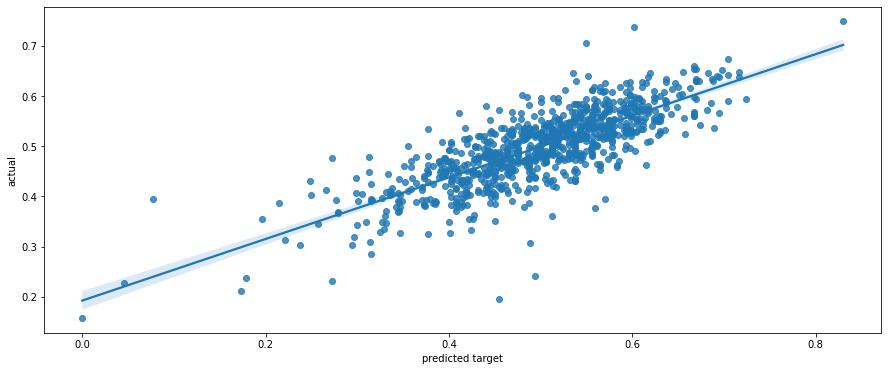

In [ ]:
#@title predicted vs actual

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.regplot(x = y_test, y = pred_gbr)
plt.xlabel('predicted target')
plt.ylabel('actual')
plt.show()

In [ ]:
explainer = shap.Explainer(gbr)
shap_values = explainer(X_test)

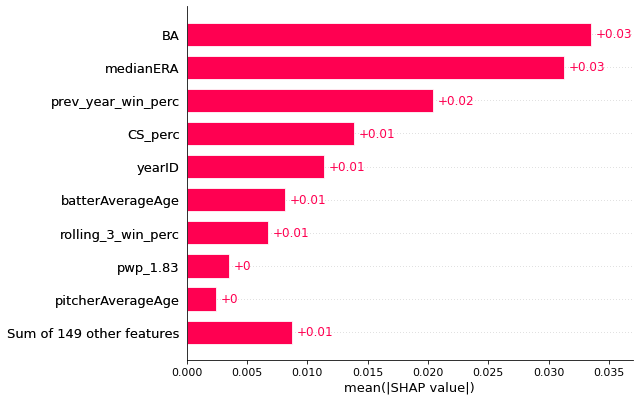

In [ ]:
shap.plots.bar(shap_values, max_display=10) 

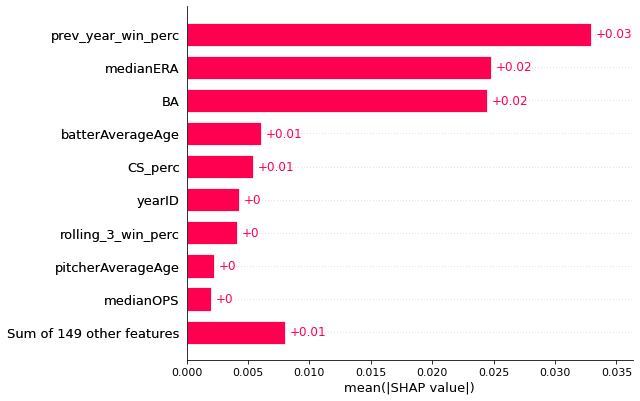

In [ ]:
explainer = shap.Explainer(rfr)
shap_values = explainer(X_test)
shap.plots.bar(shap_values, max_display=10) 